In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Initial Conditions

The parameters for the system are defined as follows:

$$
\begin{aligned}
\frac{b}{m} = \beta &= 2.0 \text{ s}^{-1} \\
g &= 10 \text{ m/s}^{2} \\
x_0 &= 10 \text{ m} \\
v_0 = 0 \text{ m/s}
\end{aligned}
$$

In [2]:
g = 10.0
beta = 2.0      # b/m
x0 = 10.0
v0 = 0.0


### Analytical Solution for the Dynamic System

The analytical expressions for velocity ($v$) and position ($x$) as functions of time ($t$) are derived as follows:

**Velocity:**
$$v(t) = 5 \left( 1 - e^{-2t} \right)$$

**Position:**
$$x(t) = 10 + 5t - 2.5 \left( 1 - e^{-2t} \right)$$



In [3]:
def v_exact(t):
    return 5 * (1 - np.exp(-2*t))

def x_exact(t):
    return 10 + 5*t - 2.5*(1 - np.exp(-2*t))


In [4]:
def euler_method(n, t_end):
    dt = t_end / n
    t = np.linspace(0, t_end, n+1)
    
    x = np.zeros(n+1)
    v = np.zeros(n+1)
    
    x[0] = x0
    v[0] = v0
    
    for i in range(n):
        v[i+1] = v[i] + dt * (g - beta * v[i])
        x[i+1] = x[i] + dt * v[i]
    
    return t, x, v


Euler's method for n=50

In [5]:
t50, x50, v50 = euler_method(n=50, t_end=3.0)


Euler's method for n=500

In [6]:
t500, x500, v500 = euler_method(n=500, t_end=3.0)


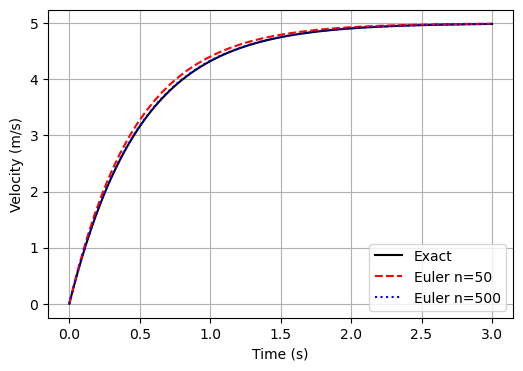

In [7]:
t_exact = np.linspace(0, 3, 1000)

plt.figure(figsize=(6,4))
plt.plot(t_exact, v_exact(t_exact), 'k', label="Exact")
plt.plot(t50, v50, 'r--', label="Euler n=50")
plt.plot(t500, v500, 'b:', label="Euler n=500")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid(True)
plt.show()


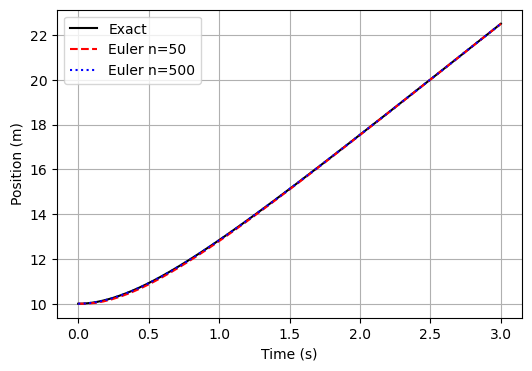

In [8]:
plt.figure(figsize=(6,4))
plt.plot(t_exact, x_exact(t_exact), 'k', label="Exact")
plt.plot(t50, x50, 'r--', label="Euler n=50")
plt.plot(t500, x500, 'b:', label="Euler n=500")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
def euler_no_drag(n, t_end):
    dt = t_end / n
    t = np.linspace(0, t_end, n+1)
    
    x = np.zeros(n+1)
    v = np.zeros(n+1)
    
    x[0] = x0
    v[0] = v0
    
    for i in range(n):
        v[i+1] = v[i] + dt * g
        x[i+1] = x[i] + dt * v[i]
    
    return t, x, v


In [10]:
t_nd, x_nd, v_nd = euler_no_drag(n=500, t_end=3.0)


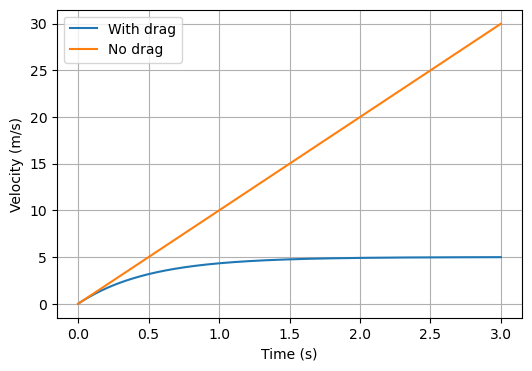

In [11]:
plt.figure(figsize=(6,4))
plt.plot(t500, v500, label="With drag")
plt.plot(t_nd, v_nd, label="No drag")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid(True)
plt.show()




### 1. Viscous Medium ($b \neq 0$)
When an object falls through a fluid, a drag force acts against the direction of motion.

* **Initial Phase:** As the object accelerates due to gravity, its velocity increases, which in turn increases the drag force.
* **The Balance:** Eventually, the upward drag force becomes equal in magnitude to the downward gravitational force.
* **Terminal Velocity:** At this point, the net force is zero ($F_{net} = 0$), and the object stops accelerating. It continues to fall at a steady speed known as *terminal velocity*.



### 2. Non-Viscous Medium ($b = 0$)
In a vacuum or a theoretical "perfect" fluid where there is no resistance:

* **Constant Acceleration:** The only force acting on the object is gravity ($F = mg$).
* **Linear Increase:** Because there is no opposing force to counter gravity, the velocity increases linearly and indefinitely over time, following the equation:
  $$v(t) = v_0 + gt$$
* **No Limit:** Unlike the viscous model, the object never reaches a "top speed" or terminal velocity.